In [64]:
import numpy as np
import pandas as pd
import seaborn as sns
import scipy.stats as stats
from sklearn.model_selection import train_test_split, GridSearchCV
# from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import r2_score, confusion_matrix, accuracy_score
from statsmodels.stats.stattools import durbin_watson
from statsmodels.stats.diagnostic import het_breuschpagan
from scipy.special import boxcox,boxcox1p, inv_boxcox
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt

In [4]:
df = pd.read_csv('Iris.csv')

In [5]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [6]:
del(df)

In [10]:
iris = load_iris()

In [11]:
x = iris.data
x = pd.DataFrame(x,columns=iris['feature_names'])

In [13]:
x

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [23]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [21]:
y = iris.target
y = pd.DataFrame(y,columns=['Species'])

In [22]:
y

,Species
0,0
1,0
2,0
3,0
4,0
...,...
145,2
146,2
147,2
148,2


/home/eshaan/.local/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Species', ylabel='count'>

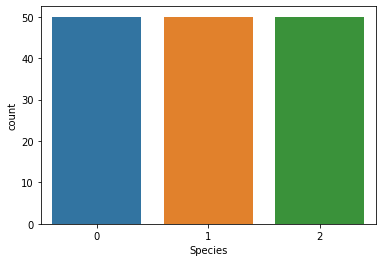

In [25]:
sns.countplot(y['Species'])

In [26]:
y = y.iloc[:,0]

In [27]:
x_train,x_test,y_train,y_test = train_test_split(x,y,train_size = 0.8,random_state=100)

In [29]:
model_knn = KNeighborsClassifier(n_neighbors=3)

In [30]:
model_knn.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=3)

In [31]:
pred = model_knn.predict(x_test)

In [33]:
model_knn.score(x_train,y_train)

0.9583333333333334

In [34]:
model_knn.score(x_test,y_test)

1.0

In [36]:
confusion_matrix(y_test,pred)

array([[11,  0,  0],
       [ 0,  6,  0],
       [ 0,  0, 13]])

### Finding the best value of K

In [38]:
params = {'n_neighbors':range(1,50)}
gs_model = GridSearchCV(KNeighborsClassifier(),params)
gs_model.fit(x_train,y_train)

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': range(1, 50)})

In [39]:
gs_model.best_params_

{'n_neighbors': 15}

In [40]:
p = gs_model.predict(x_test)

In [43]:
confusion_matrix(y_test,p)

array([[11,  0,  0],
       [ 0,  5,  1],
       [ 0,  0, 13]])

In [42]:
accuracy_score(y_test,p)

0.9666666666666667

In [44]:
model_knn = KNeighborsClassifier(n_neighbors=15)

In [46]:
model_knn.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=15)

In [48]:
pred = model_knn.predict(x_test)

In [52]:
29/30

0.9666666666666667

In [51]:
x_test.shape

(30, 4)

In [49]:
accuracy_score(y_test,pred)

0.9666666666666667

In [53]:
error = []
for i in range(1,50):
    model_knn = KNeighborsClassifier(n_neighbors=i)
    model_knn.fit(x_train,y_train)
    pred_i = model_knn.predict(x_test)
    error.append(1-accuracy_score(y_test,pred_i))

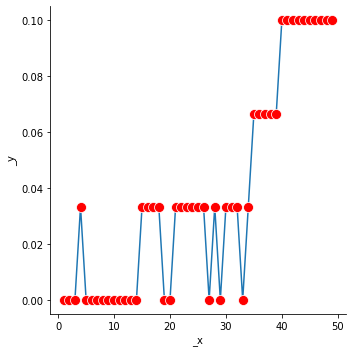

In [63]:
sns.relplot(x = range(1,50),y = error,kind='line',marker='o',markerfacecolor='red',markersize=10)

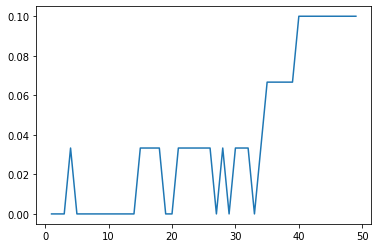

In [66]:
plt.plot(range(1,50),error)

In [60]:
type(error)

list